In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Ts=["10", "300", "1500"]

E_paths = [l+"_E.dat" for l in Ts]
g_paths = [l+"_g.dat" for l in Ts]
rms_paths = [l+"_rms.dat" for l in Ts]
T_paths = [l+"_T.dat" for l in Ts]

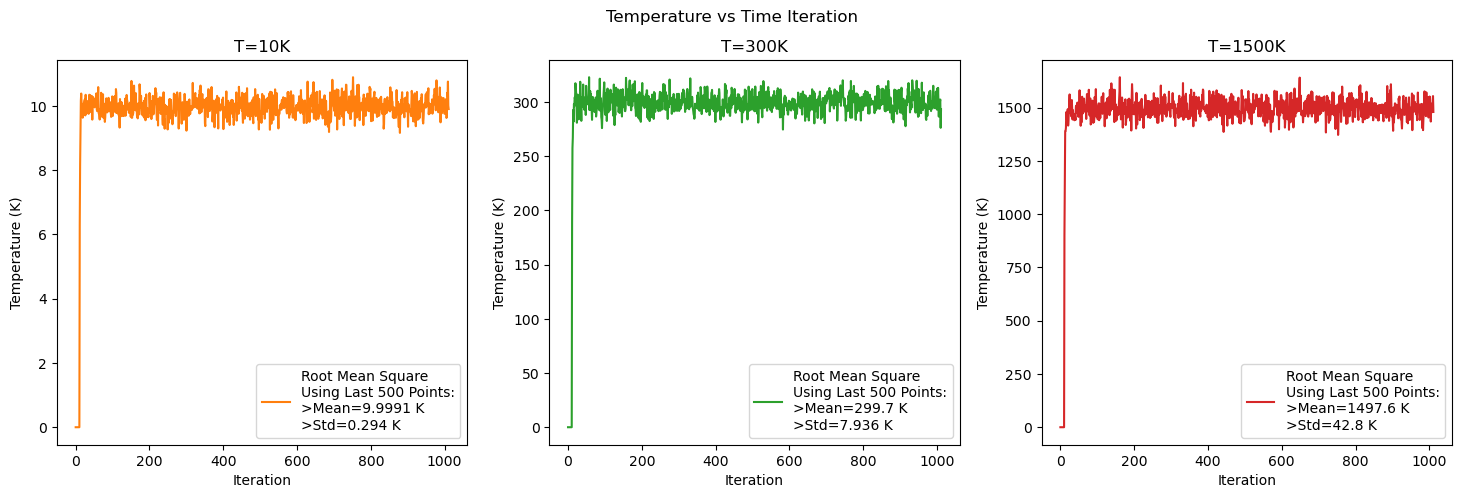

In [3]:
fig=plt.figure(figsize=(18,5))
cs=[ u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']
for k, (T_path,T) in enumerate(zip(T_paths, Ts)):
    Et=np.loadtxt(T_path).astype(np.float64)
    Et[:,0] = 1011*Et[:,0]/(Et[:,0].max())
    ax = fig.add_subplot(1,3,k+1)
    av_last_500 = Et[-500:,1].mean()
    std_last_500 = Et[-500:,1].std()
    ax.plot(Et[:,0], Et[:,1], '-', color=cs[k], label=f"Root Mean Square\nUsing Last 500 Points:\n>Mean={av_last_500:.5} K\n>Std={std_last_500:.4} K")
    ax.set_title(f"T={T}K")
    ax.legend()
    ax.set_ylabel("Temperature (K)")
    ax.set_xlabel("Iteration")
fig.suptitle("Temperature vs Time Iteration")
plt.savefig("T.png",dpi=150)
plt.show()

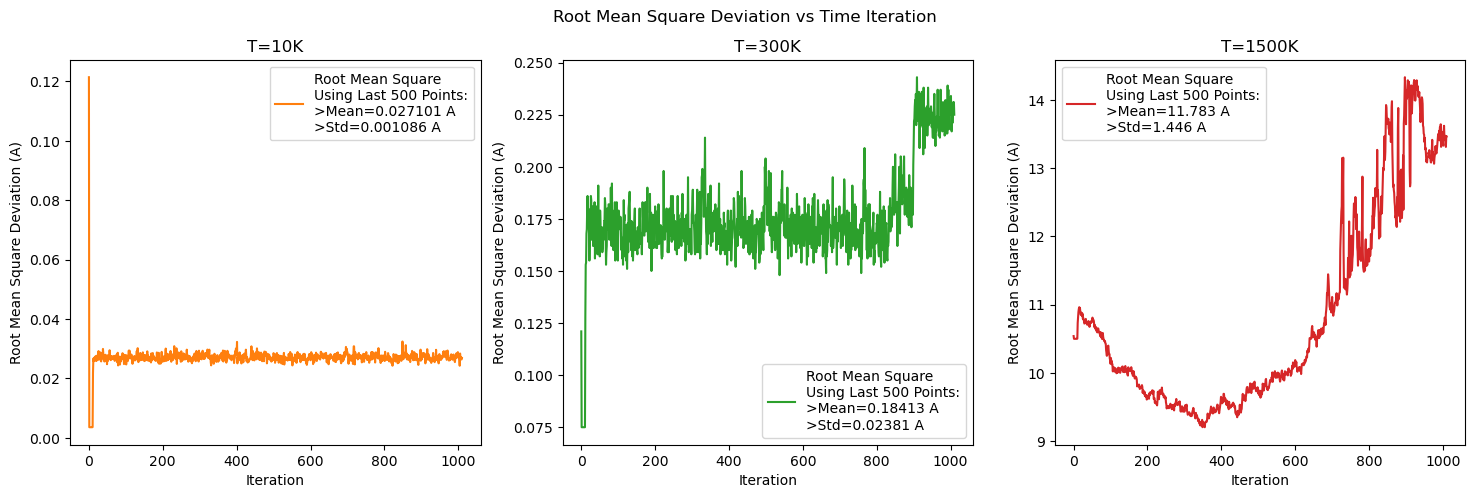

In [4]:
fig=plt.figure(figsize=(18,5))
cs=[ u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']
for k, (rms_path,T) in enumerate(zip(rms_paths, Ts)):
    Et=np.loadtxt(rms_path).astype(np.float64)
    ax = fig.add_subplot(1,3,k+1)
    av_last_500 = Et[-500:,1].mean()
    std_last_500 = Et[-500:,1].std()
    ax.plot(Et[:,0], Et[:,1], '-', color=cs[k], label=f"Root Mean Square\nUsing Last 500 Points:\n>Mean={av_last_500:.5} A\n>Std={std_last_500:.4} A")
    ax.set_title(f"T={T}K")
    ax.legend()
    ax.set_ylabel("Root Mean Square Deviation (A)")
    ax.set_xlabel("Iteration")
fig.suptitle("Root Mean Square Deviation vs Time Iteration")
plt.savefig("rms.png",dpi=150)
plt.show()

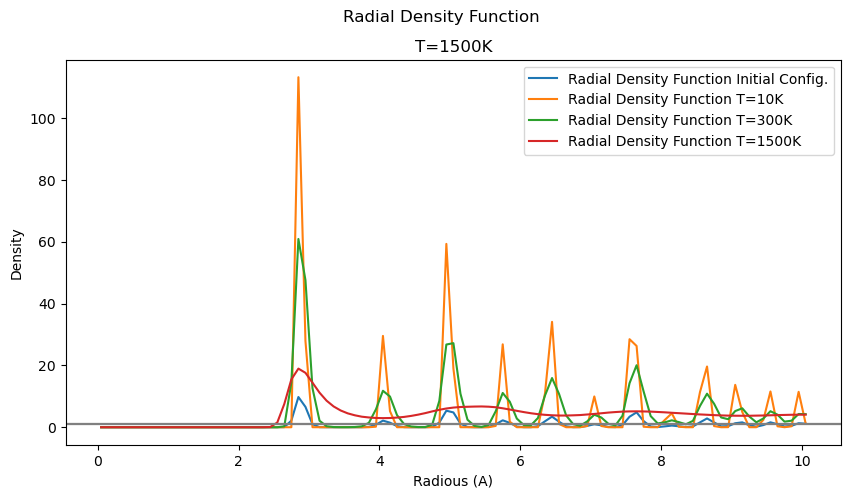

In [5]:
fig=plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
g=np.loadtxt("g.dat").astype(np.float64)
ax.plot(g[:,0], g[:,1], '-', color=u'#1f77b4', label=f"Radial Density Function Initial Config.", markersize=3)
#ax = fig.add_subplot(1,2,2)
cs=[ u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']
for k, (g_path,T) in enumerate(zip(g_paths, Ts)):
    g=np.loadtxt(g_path).astype(np.float64)
    #av_last_500 = Et[-500:,1].mean()
    #std_last_500 = Et[-500:,1].std()
    ax.plot(g[:,0], g[:,1], '-', color=cs[k], label=f"Radial Density Function T={T}K", markersize=3)
    ax.set_title(f"T={T}K")
    ax.legend()
    ax.set_xlabel("Radious (A)")
    ax.set_ylabel("Density")
    ax.axhline(1, color='gray')
fig.suptitle("Radial Density Function")
plt.savefig("g_T.png",dpi=150)
plt.show()

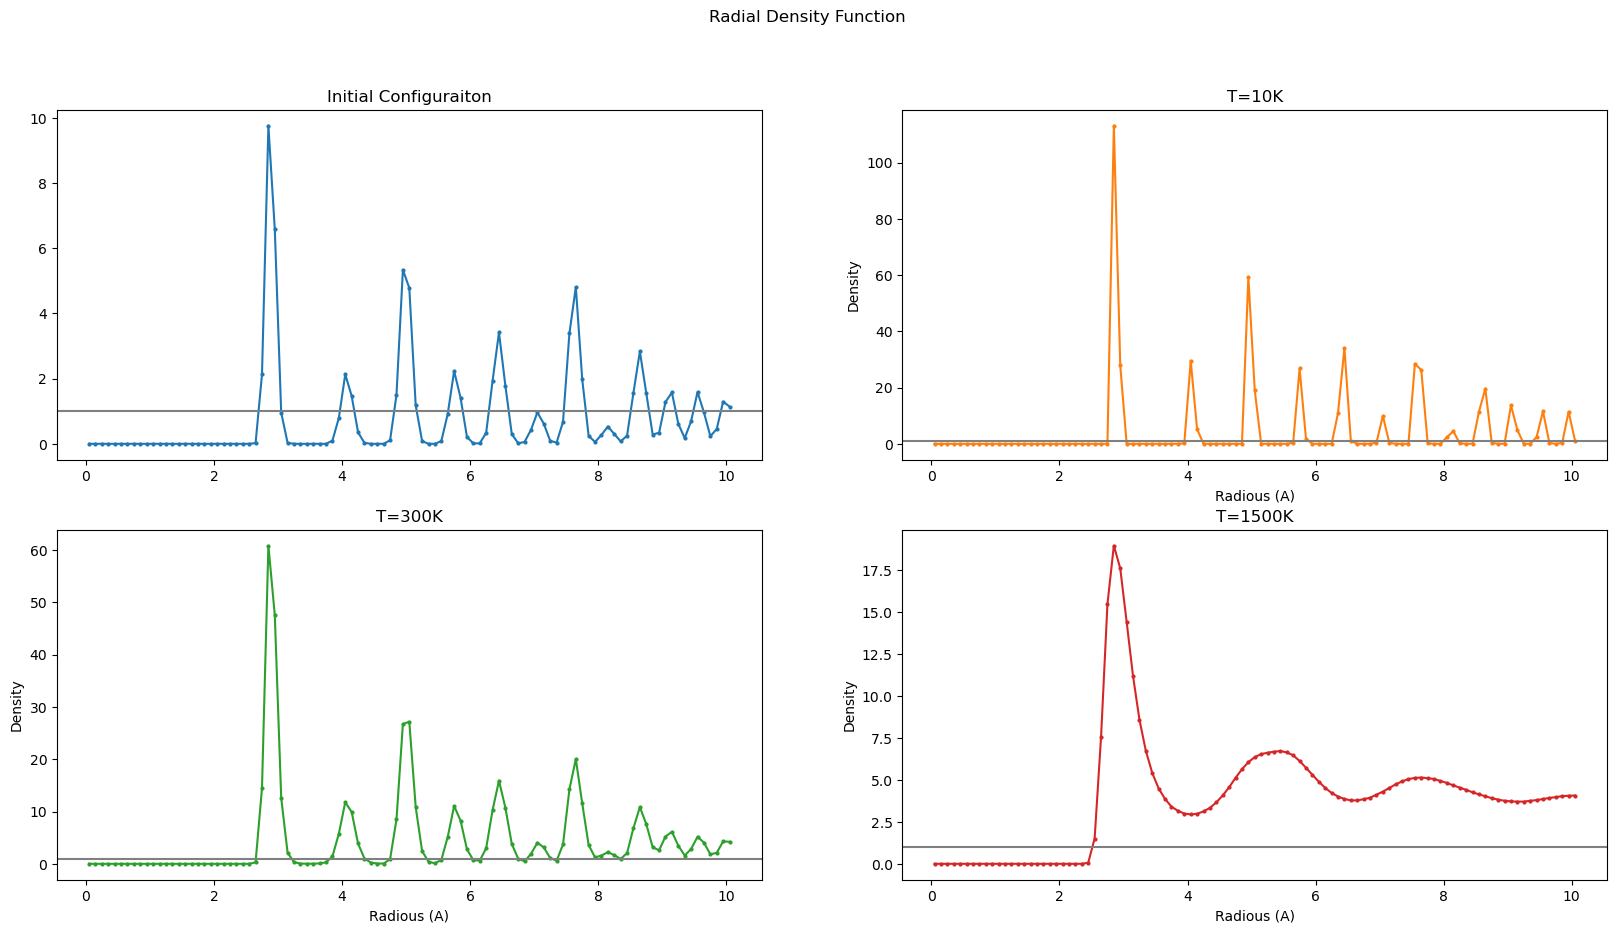

In [6]:
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(2,2,1)
g=np.loadtxt("g.dat").astype(np.float64)
ax.plot(g[:,0], g[:,1], '-o', color=u'#1f77b4',label=f"Radial Density Function", markersize=2)
ax.set_title(f"Initial Configuraiton")
ax.axhline(1, color='gray')
cs=[ u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']

for k, (g_path,T) in enumerate(zip(g_paths, Ts)):
    g=np.loadtxt(g_path).astype(np.float64)
    ax = fig.add_subplot(2,2,k+2)
    #av_last_500 = Et[-500:,1].mean()
    #std_last_500 = Et[-500:,1].std()
    ax.plot(g[:,0], g[:,1], '-o', color=cs[k], label=f"Radial Density Function", markersize=2)
    ax.set_title(f"T={T}K")
    ax.set_xlabel("Radious (A)")
    ax.set_ylabel("Density")
    ax.axhline(1, color='gray')
fig.suptitle("Radial Density Function")
plt.savefig("g_T_sep.png",dpi=150)
plt.show()

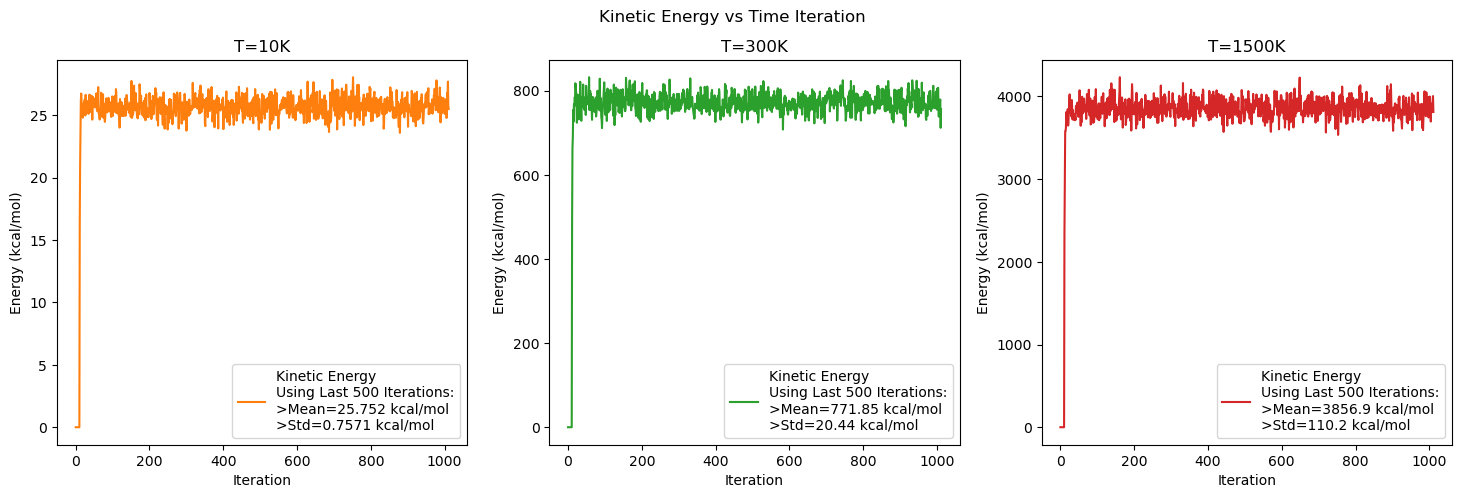

In [7]:
fig=plt.figure(figsize=(18,5))
cs=[ u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']
for k, (E_path,T) in enumerate(zip(E_paths, Ts)):
    Et=np.loadtxt(E_path).astype(np.float64)
    Et[:,0] = 1011*Et[:,0]/(Et[:,0].max())
    ax = fig.add_subplot(1,3,k+1)
    av_last_500 = Et[-500:,1].mean()
    std_last_500 = Et[-500:,1].std()
    ax.plot(Et[:,0], Et[:,1], '-', color=cs[k],label=f"Kinetic Energy\nUsing Last 500 Iterations:\n>Mean={av_last_500:.5} kcal/mol\n>Std={std_last_500:.4} kcal/mol")
    ax.set_title(f"T={T}K")
    ax.legend()
    ax.set_ylabel("Energy (kcal/mol)")
    ax.set_xlabel("Iteration")
fig.suptitle("Kinetic Energy vs Time Iteration")
plt.savefig("Kinetic_t.png",dpi=150)
plt.show()

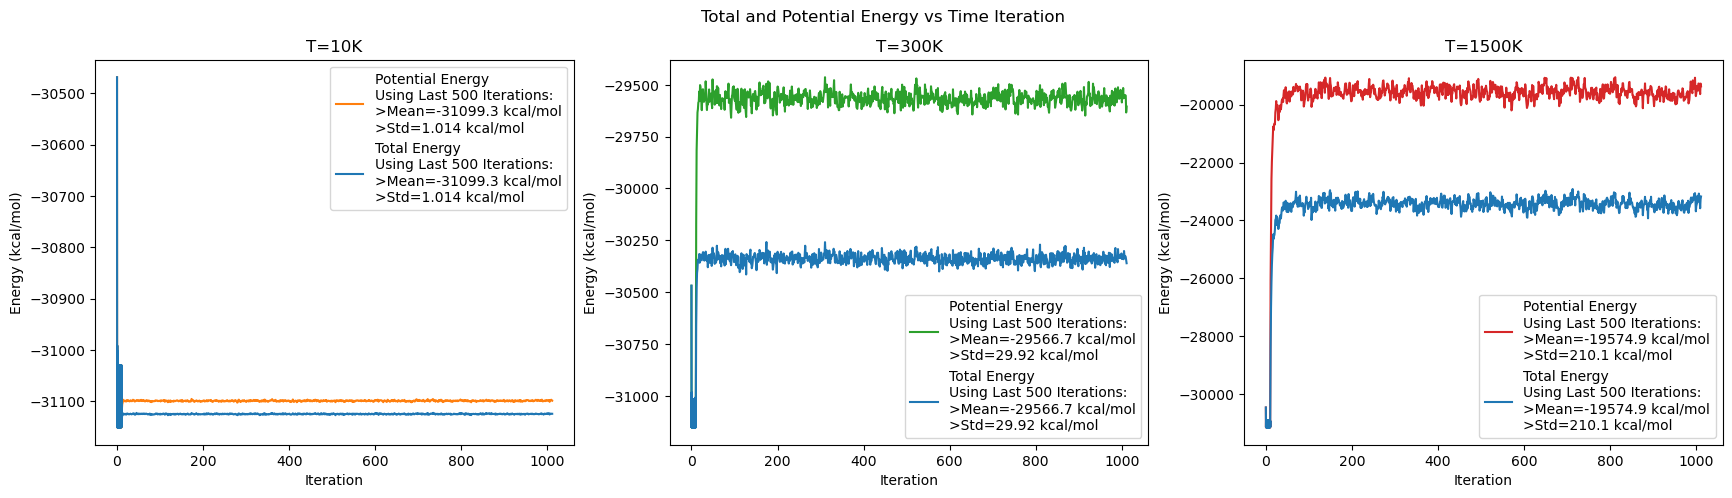

In [8]:
fig=plt.figure(figsize=(21,5))
cs=[ u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']
for k, (E_path,T) in enumerate(zip(E_paths, Ts)):
    Et=np.loadtxt(E_path).astype(np.float64)
    Et[:,0] = 1011*Et[:,0]/(Et[:,0].max())
    ax = fig.add_subplot(1,3,k+1)
    av_last_500 = Et[-500:,2].mean()
    std_last_500 = Et[-500:,2].std()
    ax.plot(Et[:,0], Et[:,2], '-',color=cs[k], label=f"Potential Energy\nUsing Last 500 Iterations:\n>Mean={av_last_500:.6} kcal/mol\n>Std={std_last_500:.4} kcal/mol")
    av_last_500 = Et[-500:,2].mean()
    std_last_500 = Et[-500:,2].std()
    ax.plot(Et[:,0], Et[:,3], '-', label=f"Total Energy\nUsing Last 500 Iterations:\n>Mean={av_last_500:.6} kcal/mol\n>Std={std_last_500:.4} kcal/mol")
    ax.set_title(f"T={T}K")
    ax.legend()
    ax.set_ylabel("Energy (kcal/mol)")
    ax.set_xlabel("Iteration")
fig.suptitle("Total and Potential Energy vs Time Iteration")
plt.savefig("Potential_Total_t.png",dpi=150)
plt.show()